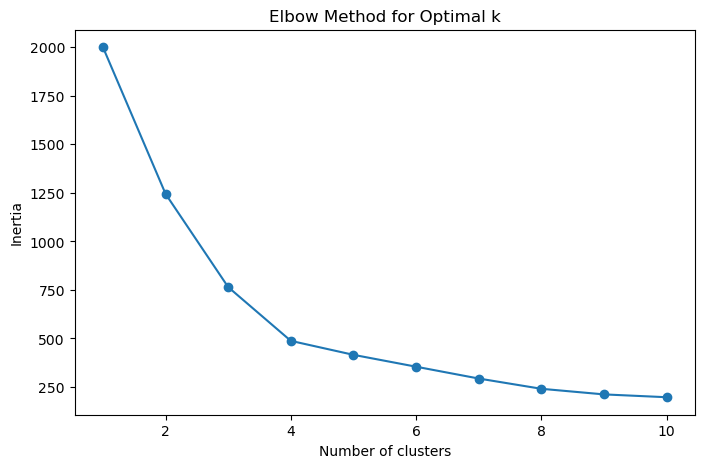

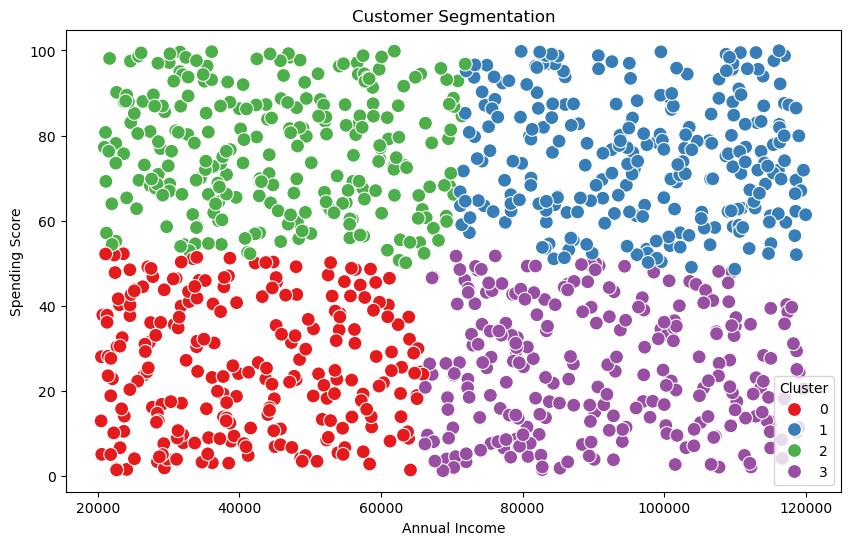

Silhouette Score: 0.41


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic customer data
np.random.seed(42)
num_customers = 1000
data = {
    'annual_income': np.random.uniform(20000, 120000, size=num_customers),
    'spending_score': np.random.uniform(1, 100, size=num_customers),
}

# Create DataFrame
df = pd.DataFrame(data)

# Data preprocessing
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Determine the optimal number of clusters using the Elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Based on the Elbow method, choose the optimal number of clusters (let's assume k=4 for this example)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Add cluster labels to the original DataFrame
df['cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_income', y='spending_score', hue='cluster', data=df, palette='Set1', s=100)
plt.title('Customer Segmentation')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.show()

# Evaluate the clustering with silhouette score
silhouette_avg = silhouette_score(df_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg:.2f}')
